# Dogs vs Cats

from kaggle contest:

https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition

## Download Dataset

In [1]:
import os

TMP_DIR = './tmp/'

def make_dir(path):
    if not os.path.exists(path):
        os.mkdir(path)

make_dir(TMP_DIR)

In [3]:
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -f train.zip -p './tmp'
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -f test.zip -p './tmp'

100%|█████████████████████████████████████████| 544M/544M [14:41<00:00, 665kB/s]
100%|█████████████████████████████████████████| 544M/544M [14:41<00:00, 646kB/s]
100%|████████████████████████████████████████| 271M/271M [04:48<00:00, 1.63MB/s]
100%|█████████████████████████████████████████| 271M/271M [04:48<00:00, 986kB/s]


In [4]:
!unzip -uq tmp/train.zip -d tmp/
!unzip -uq tmp/test.zip -d tmp/

In [7]:
import random

train_validation_split = 0.9

make_dir('./tmp/train-data')
make_dir('./tmp/train-data/dog')
make_dir('./tmp/train-data/cat')

make_dir('./tmp/validation-data')
make_dir('./tmp/validation-data/dog')
make_dir('./tmp/validation-data/cat')

for base, _, filenames in os.walk('./tmp/train'):
    cats = [name for name in filenames if 'cat' in name ]
    dogs = [name for name in filenames if 'dog' in name ]
    random.seed(42)
    random.shuffle(cats)
    random.seed(42)
    random.shuffle(dogs)
    
    cats_number = len(cats)
    dogs_number = len(dogs)
    
    train_cats = cats[:int(cats_number*train_validation_split)]
    validation_cats = cats[int(cats_number*train_validation_split):]
    
    train_dogs = dogs[:int(dogs_number*train_validation_split)]
    validation_dogs = dogs[int(dogs_number*train_validation_split):]
    
    for name in train_cats:
        os.rename(base + '/' + name, './tmp/train-data' + '/cat/' + name)
        
    for name in validation_cats:
        os.rename(base + '/' + name, './tmp/validation-data' + '/cat/' + name)
        
    for name in train_dogs:
        os.rename(base + '/' + name, './tmp/train-data' + '/dog/' + name)
        
    for name in validation_dogs:
        os.rename(base + '/' + name, './tmp/validation-data' + '/dog/' + name)

## Exploration

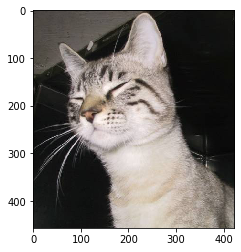

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

CATS_DIR = './tmp/train-data/cat/'
cats = os.listdir(CATS_DIR)
img = matplotlib.image.imread(CATS_DIR + cats[0])
plt.imshow(img)

## Model Training

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4333824   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

In [5]:
model.compile(loss='binary_crossentropy',
              optimizers=keras.optimizers.RMSprop(lr=0.001),
              metrics=['acc']
             )

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255
)
train_generator = train_datagen.flow_from_directory(
    './tmp/train-data',
    target_size=(100, 100),
    batch_size=100,
    class_mode='binary'
)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)
validation_generator = validation_datagen.flow_from_directory(
    './tmp/validation-data',
    target_size=(100, 100),
    batch_size=100,
    class_mode='binary'
)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [7]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
225/225 [==============================] - 179s 794ms/step - loss: 0.6635 - acc: 0.6555 - val_loss: 0.5434 - val_acc: 0.7344
Epoch 2/10
225/225 [==============================] - 202s 896ms/step - loss: 0.5147 - acc: 0.7461 - val_loss: 0.5076 - val_acc: 0.7532
Epoch 3/10
225/225 [==============================] - 215s 958ms/step - loss: 0.4542 - acc: 0.7847 - val_loss: 0.4943 - val_acc: 0.7684
Epoch 4/10
225/225 [==============================] - 327s 1s/step - loss: 0.3939 - acc: 0.8218 - val_loss: 0.5106 - val_acc: 0.7708
Epoch 5/10
225/225 [==============================] - 155s 688ms/step - loss: 0.3251 - acc: 0.8567 - val_loss: 0.5997 - val_acc: 0.7388
Epoch 6/10
225/225 [==============================] - 146s 650ms/step - loss: 0.2621 - acc: 0.8903 - val_loss: 0.7226 - val_acc: 0.7168
Epoch 7/10
225/225 [==============================] - 195s 868ms/step - loss: 0.1986 - acc: 0.9237 - val_loss: 0.6385 - val_acc: 0.7660
Epoch 8/10
225/225 [==============================]